## Creating a Classification Model that clarifies whether the agent is depressed or not based on Gender, Age, Stream and Anxiety

### In this project we will perform EDA, Feature Engineering, Model Building and Evaluating the Model

#### Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Dataset

In [2]:
df = pd.read_csv('./Student Mental health.csv')
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [3]:
#check the shape of the dataset
df.shape

(101, 11)

In [4]:
#specify the column names
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [5]:
#data-types of columns
df.dtypes


Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [6]:
#renaming columns
df.columns = ['time','gender','age','course','year','cgpa','ms','depression','anxiety','panic','treatment']
df

,time,gender,age,course,year,cgpa,ms,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [7]:
#selecting the necessary features for visualisation
df.drop(columns=['time','treatment','ms'],inplace=True,axis=1)
df

,gender,age,course,year,cgpa,depression,anxiety,panic
0,Female,18.0,Engineering,year 1,3.00 - 3.49,Yes,No,Yes
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,Yes,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,Yes,Yes,Yes
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No
...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,Yes,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,Yes,Yes,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,No,Yes
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No


#### Making Depression the target variable  

In [8]:
#checking class balance
df.depression.value_counts()

No     66
Yes    35
Name: depression, dtype: int64

#### Checking the Class Balance

In [9]:
#checking null values
df.isnull().sum()

gender        0
age           1
course        0
year          0
cgpa          0
depression    0
anxiety       0
panic         0
dtype: int64

In [10]:
df.age.describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: age, dtype: float64

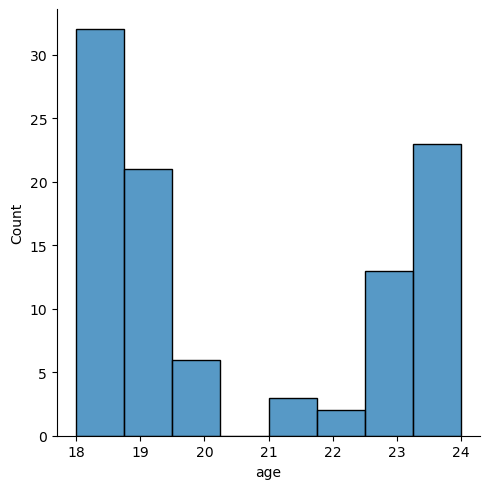

In [11]:
sns.displot(df.age)

#### Age has a NULL value which can be replaced by mean since no outlier was detected

#### Verifying whether the data belongs to students only as Age distribution falls between 18-24

In [12]:
df.fillna(int(df.age.mean()),inplace=True)

In [13]:
df.isnull().sum()

gender        0
age           0
course        0
year          0
cgpa          0
depression    0
anxiety       0
panic         0
dtype: int64

In [14]:
#checking for the duplicates
df.duplicated().sum()

1

In [15]:
#drop the duplicate
df.drop_duplicates(inplace=True)

In [16]:
#checking unique values
df.course.value_counts()

BCS                        18
Engineering                16
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

#### Here we have many unique values so the values which are less than 10 will be assigned to the 'Other' category which will be beneficial in encoding the variables.

In [17]:
d = dict(df['course'].value_counts())


In [18]:
l=[]
for i,j in d.items():
    if j<10:
        l.append(i)
l

['Biomedical science',
 'KOE',
 'BENL',
 'Laws',
 'psychology',
 'Engine',
 'Islamic Education',
 'Biotechnology',
 'engin',
 'Econs',
 'MHSC',
 'Malcom',
 'Kop',
 'Human Sciences ',
 'Communication ',
 'Nursing ',
 'Diploma Nursing',
 'IT',
 'Pendidikan Islam ',
 'Radiography',
 'Fiqh fatwa ',
 'DIPLOMA TESL',
 'Koe',
 'Fiqh',
 'CTS',
 'koe',
 'Benl',
 'Kirkhs',
 'Mathemathics',
 'Pendidikan islam',
 'Human Resources',
 'Irkhs',
 'Psychology',
 'KENMS',
 'Accounting ',
 'ENM',
 'Marine science',
 'Banking Studies',
 'Business Administration',
 'Law',
 'KIRKHS',
 'Usuluddin ',
 'TAASL',
 'ALA',
 'Islamic education',
 'Pendidikan Islam']

In [19]:
df['course'] = df['course'].replace(l, 'other')

In [20]:
df.course.value_counts()

other          56
BCS            18
Engineering    16
BIT            10
Name: course, dtype: int64

In [21]:
#checking the year column
df.year.value_counts()

year 1    41
Year 3    19
Year 2    15
year 2    10
year 4     8
year 3     5
Year 1     2
Name: year, dtype: int64

#### Formatting the 'y' letter with the capital 'Y' for better visualisation

In [22]:
df['year'] = df['year'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'])

In [23]:
df.year.value_counts()

Year 1    43
Year 2    25
Year 3    24
Year 4     8
Name: year, dtype: int64

In [24]:
#CGPA column
df.cgpa.value_counts()

3.50 - 4.00     47
3.00 - 3.49     42
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: cgpa, dtype: int64

#### Changing the CGPA range between 3-4 for most of the data points which might create imbalance since the general field of values lie between 0-10 scale such that it might create a bias if not handled properly and might show signs of depression as well as students with a high CGPA value might also be in depression

In [25]:
df.drop(columns=['cgpa'],axis=1,inplace=True)

In [26]:
df

,gender,age,course,year,depression,anxiety,panic
0,Female,18.0,Engineering,Year 1,Yes,No,Yes
1,Male,21.0,other,Year 2,No,Yes,No
2,Male,19.0,BIT,Year 1,Yes,Yes,Yes
3,Female,22.0,other,Year 3,Yes,No,No
4,Male,23.0,other,Year 4,No,No,No
...,...,...,...,...,...,...,...
95,Female,18.0,other,Year 1,No,No,No
96,Female,21.0,BCS,Year 1,No,Yes,No
98,Female,19.0,other,Year 3,Yes,No,Yes
99,Female,23.0,other,Year 4,No,No,No


## Visualisations

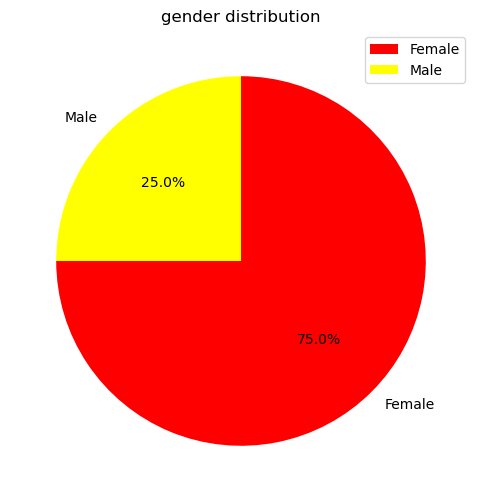

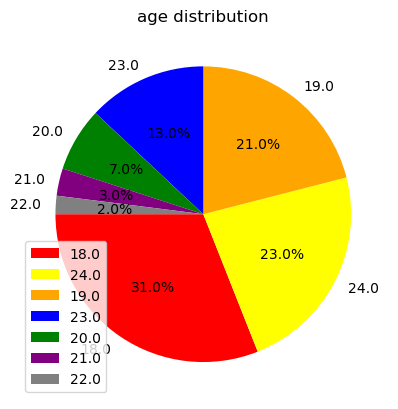

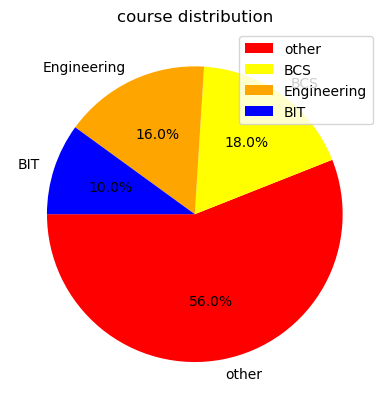

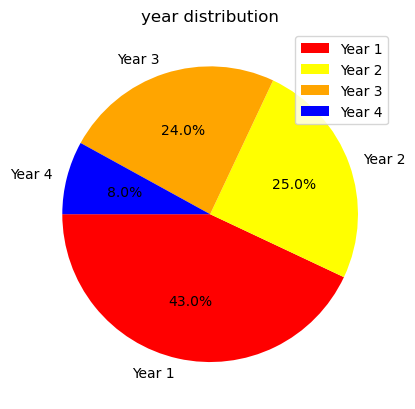

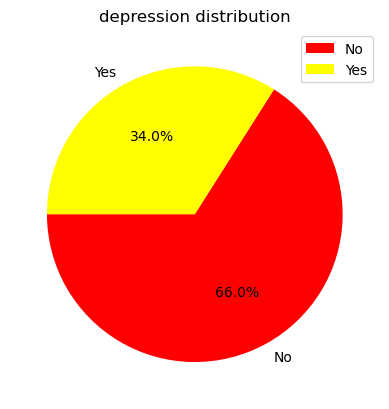

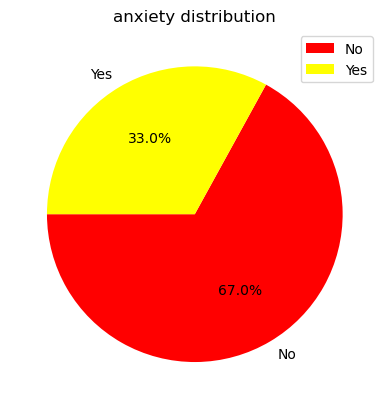

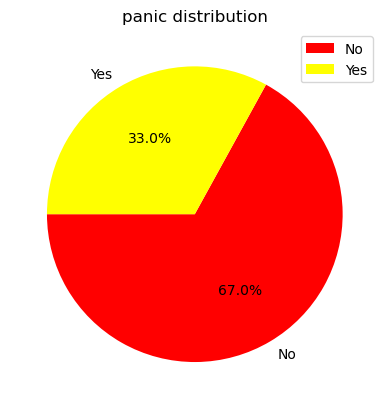

In [27]:
plt.figure(figsize=(12,6))
for i in df.columns:
    plt.title(i + ' distribution')
    g = plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, colors=['red','yellow','orange','blue','green','purple','grey'],autopct='%1.1f%%', startangle=180);
    plt.legend()
    plt.show()

<Figure size 600x600 with 0 Axes>

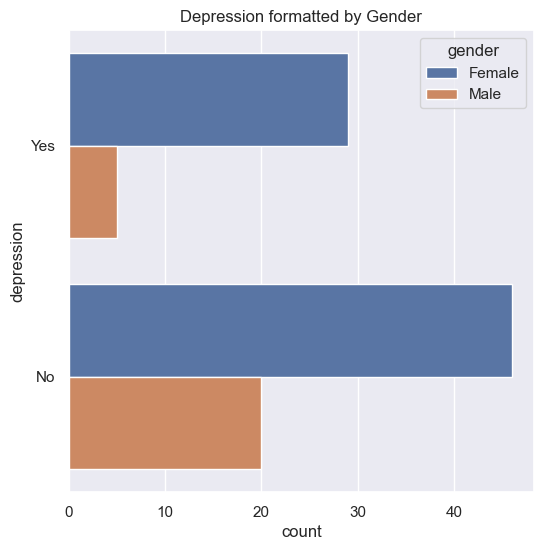

In [30]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='depression', hue="gender", data=df)
plt.title("Depression formatted by Gender")
plt.show()

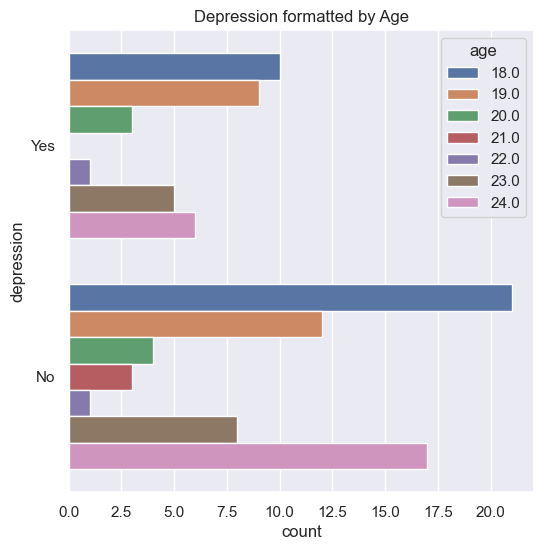

In [31]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='depression', hue="age", data=df)
plt.title("Depression formatted by Age")
plt.show()

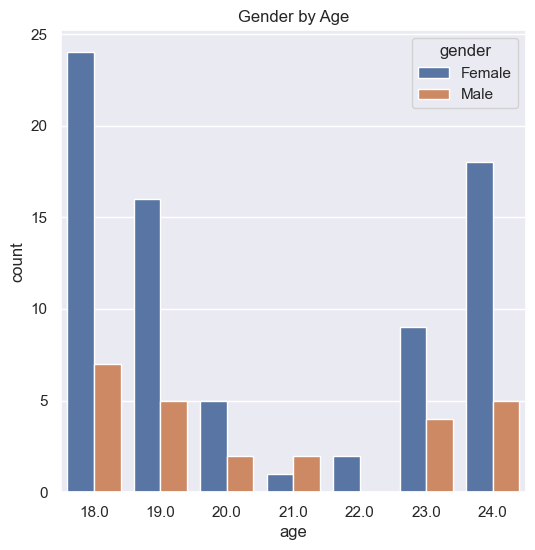

In [32]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='age', hue="gender", data=df)
plt.title("Gender by Age")
plt.show()

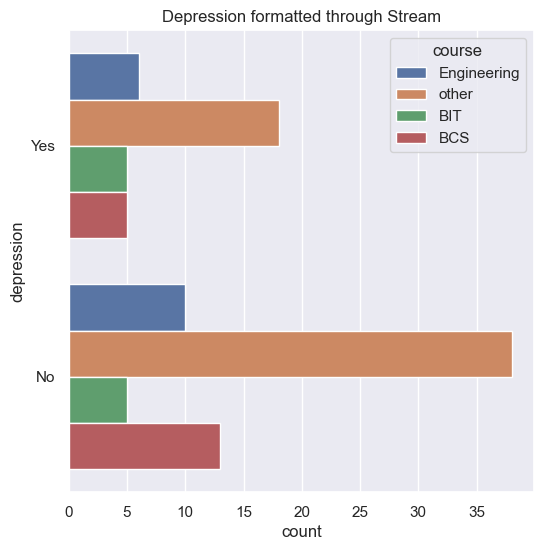

In [33]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='depression', hue="course", data=df)
plt.title("Depression formatted through Stream")
plt.show()